# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 
Download the data from [here](https://drive.google.com/file/d/1o-vZHHSywBksnPuGRunvpdYN7grYbe8h/view?usp=sharing) and place it in the data folder

In [1]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import pandas as pd



In [2]:
housing = pd.read_csv('../data/boston_data.csv')

housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

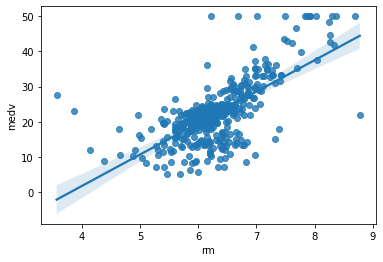

In [3]:
# Your plots here
# checking for what is correlated with MEDV -> assuming this is the value of the house. Really hard to know as there is no explanation of the names of columns...
housing.corr()

# rm vs value, not sure what rm is
ax = sns.regplot(x="rm", y="medv", data=housing)


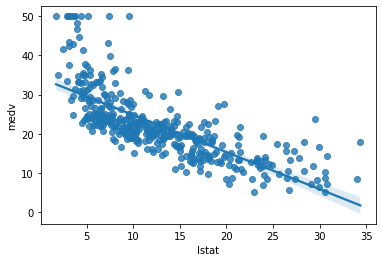

In [4]:
housing.corr()

# lstat vs value, not sure what lstat is
ax = sns.regplot(x="lstat", y="medv", data=housing)

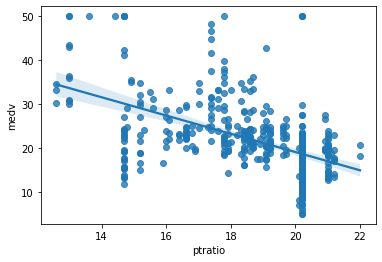

In [5]:
housing.corr()

# ptratio vs value, not sure what ptratio is
ax = sns.regplot(x="ptratio", y="medv", data=housing)
#Paolo: good plots

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
# I dont know what rm, lstat or ptratio mean, so its hard to say if they are what I expect...
# if rm is rooms, then yes, more rooms, more expensive. The other ones I have no idea...
#Paolo: you are right we should have included the descriptions

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

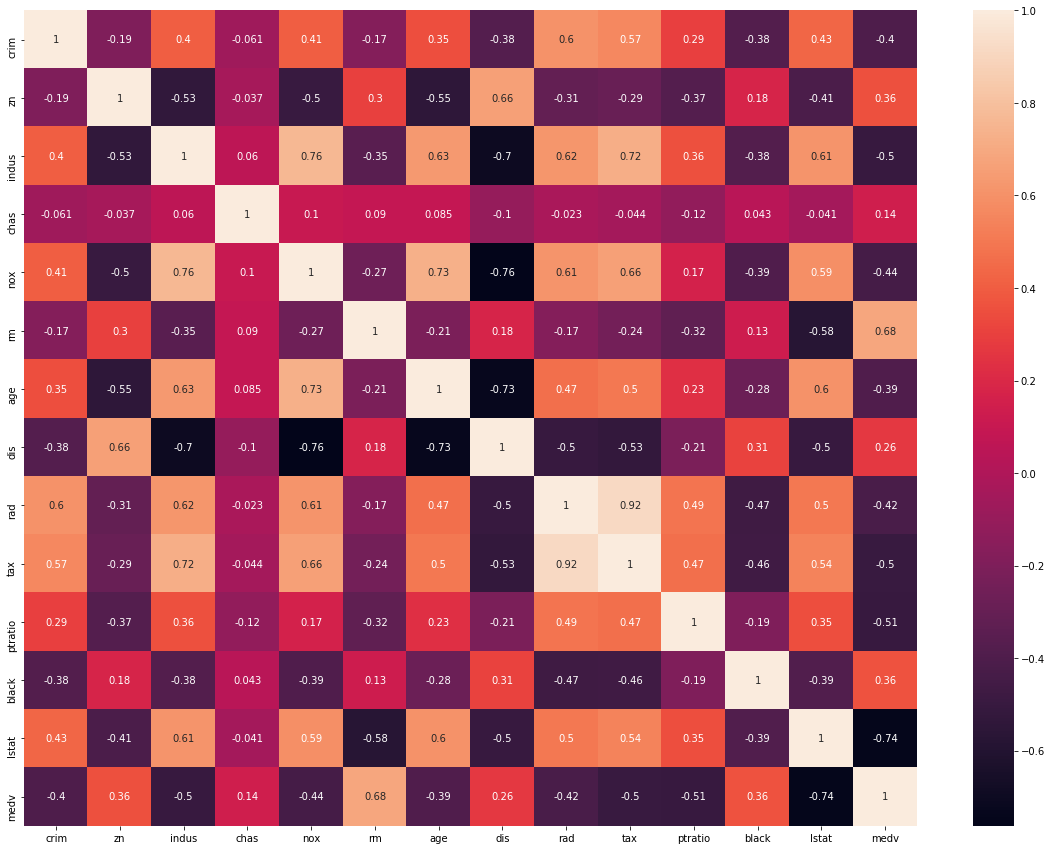

In [6]:
# Your response here
corr = housing.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
# there is no explanation for the variable names? or am I missing somethng?
# distance seems to be negatively correlated to industry, nox and age
# tax is positevely correlated with industry and nox

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [7]:
# Your code here
housing.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [8]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [13]:
# Your code here
from sklearn.model_selection import train_test_split

y = housing['medv']
X = housing.drop('medv', axis=1)  

X_train, X_test, y_train, y_test = train_test_split(X, y)
#Paolo:yes

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [10]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

model_depth_2 = RandomForestRegressor(max_depth=2)
model_depth_4 = RandomForestRegressor(max_depth=4)
model_depth_6 = RandomForestRegressor(max_depth=6)
model_depth_8 = RandomForestRegressor(max_depth=8)
model_depth_10 = RandomForestRegressor(max_depth=10)

Now, plot the score for each tree on the training set and on the testing set.

In [11]:
# Produce a plot with the score for the testing and training for the different max depths

# I'm assuming I have to use the performance_metric function, but not really sure how

In [15]:
#Paolo: Sara, for example you could try a loop like this, here on the test set
depths = [1, 2, 4, 6, 8, 10]
result = []
for  d in depths:
    RFR = RandomForestRegressor(n_estimators=10, max_depth = d)
    RFR.fit(X_train, y_train)
    y_predict=RFR.predict(X_test)
    perf=performance_metric(y_test, y_predict)
    result.append(perf)
result

[0.5367099742741692,
 0.7161262669348571,
 0.7872918688321535,
 0.8170645103874717,
 0.7980694928483796,
 0.7734142438725554]

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
# don't know
#Paolo: try comparing perfomance on train and test and maybe evaluate if there is overfit at some point.
# Paolo: This analysis could also suggest the best model. For example usually train error and test error
# decreases as you increase the depth, at some point test_error starts increasing while train error keeps
# increasing. Does it happen in this case and what does it tell you?

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
# don't know
#Paolo: maybe have a look at the definition of bias-variance trade off and try to apply it in this case

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
# don't know

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
# don't know, did we even see this model in class and all of this that is requested in this lab?
#Paolo: yes, this model was not explained in class